In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline


sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [3]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [4]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
#basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#checking null value 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
# Drop columns ID , because we don't need it.

df.drop(columns="Id",inplace=True)


#the unique quality 

print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [8]:
df.describe().round(2) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00


In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


<Axes: >

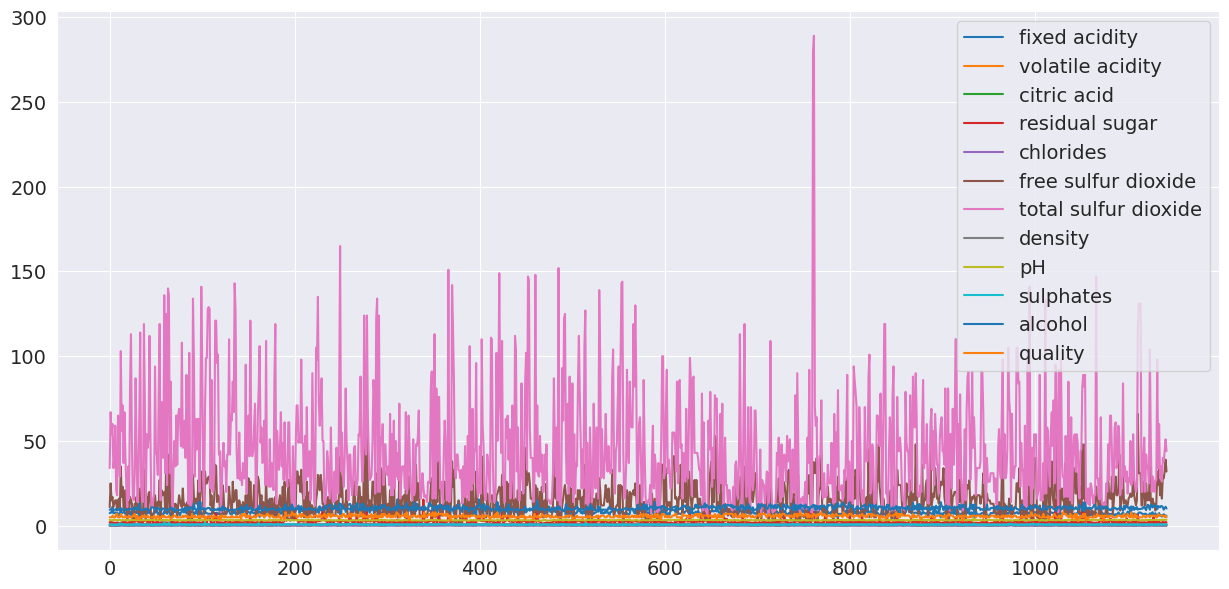

In [10]:
#graph all the data set
df.plot(figsize=(15,7))

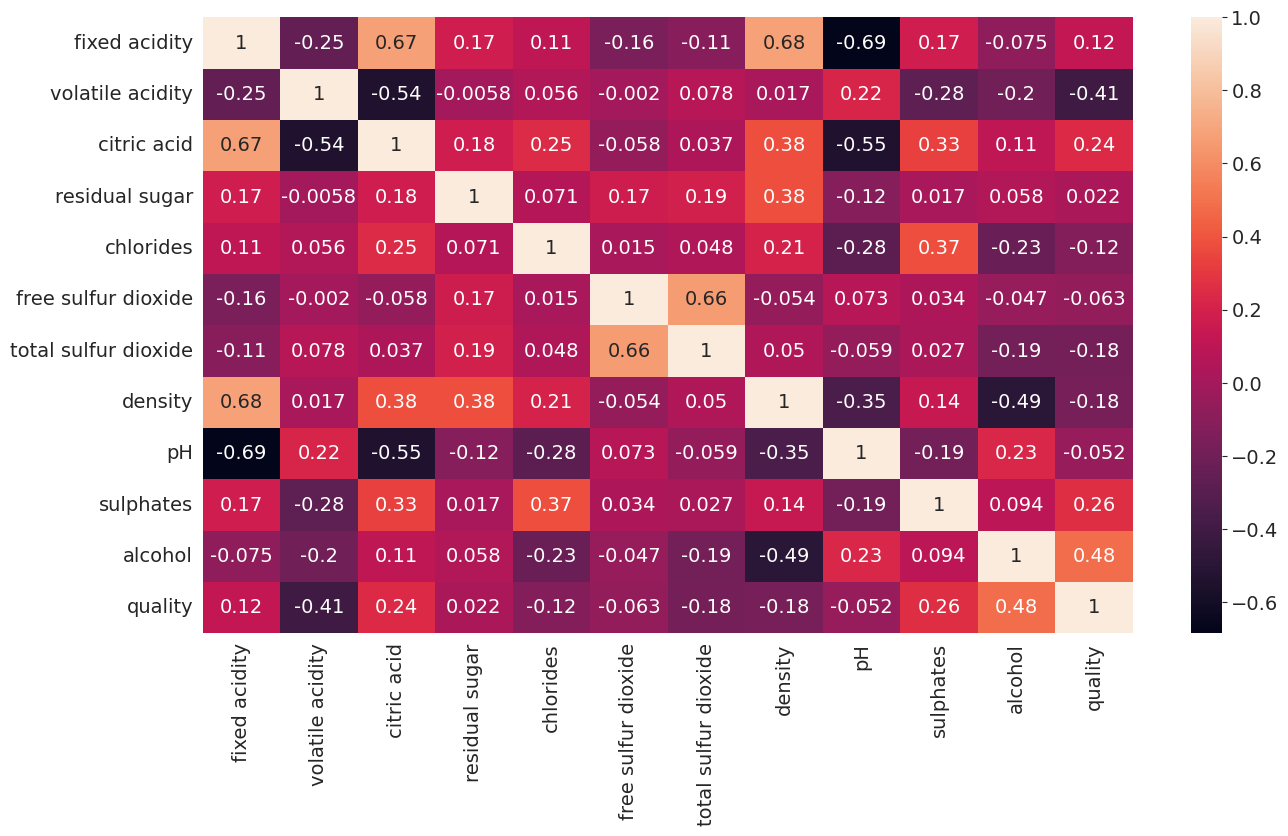

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True);

In [12]:
ave_quality = df.groupby("quality").mean()
ave_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


# EDA

<Axes: xlabel='quality'>

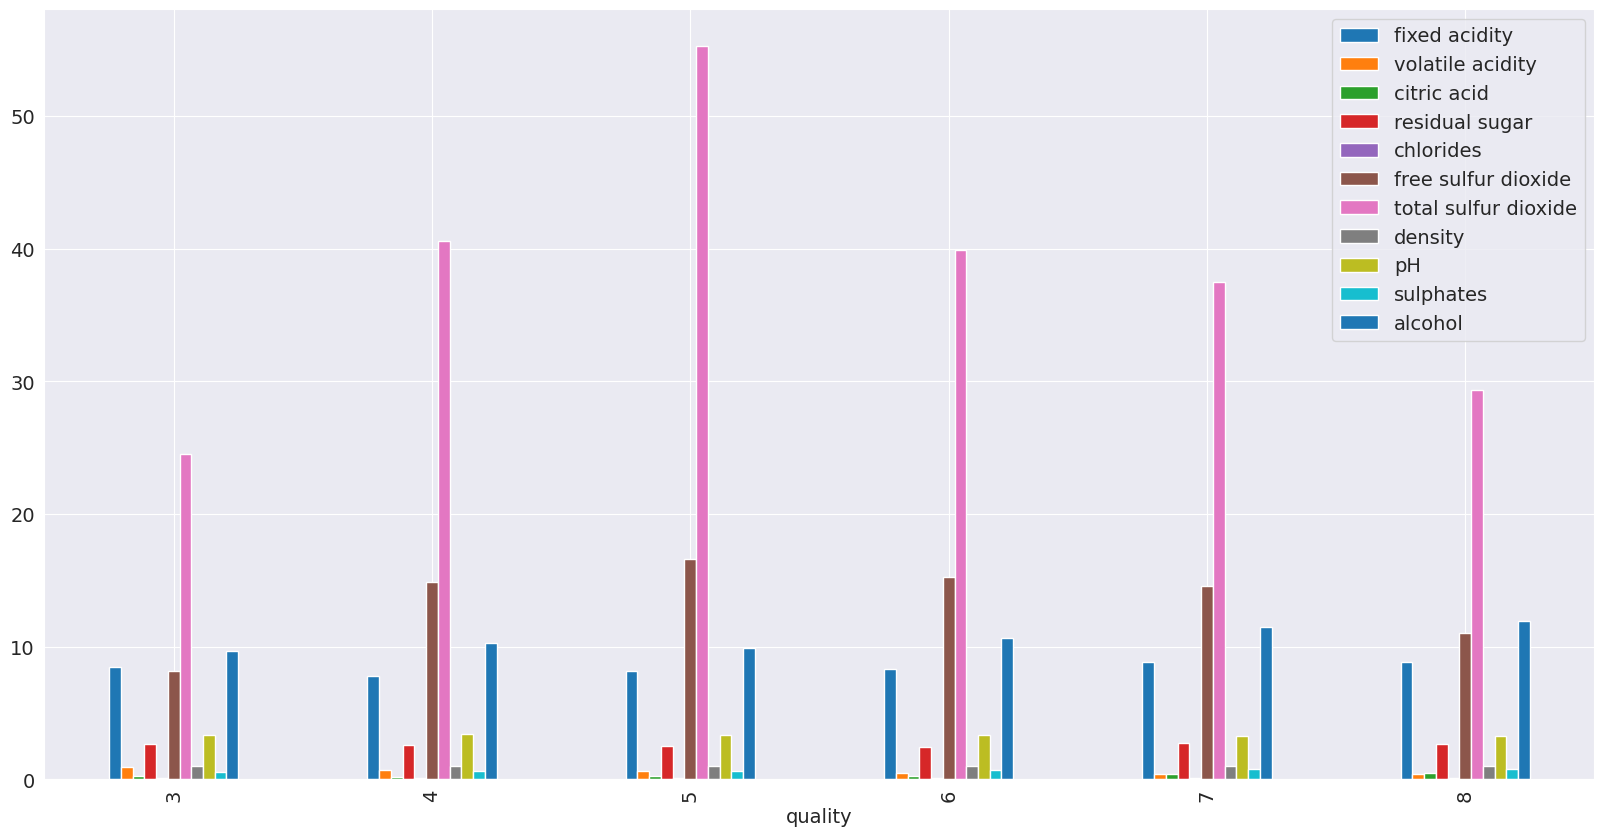

In [13]:
ave_quality.plot(kind="bar",figsize=(20,10))

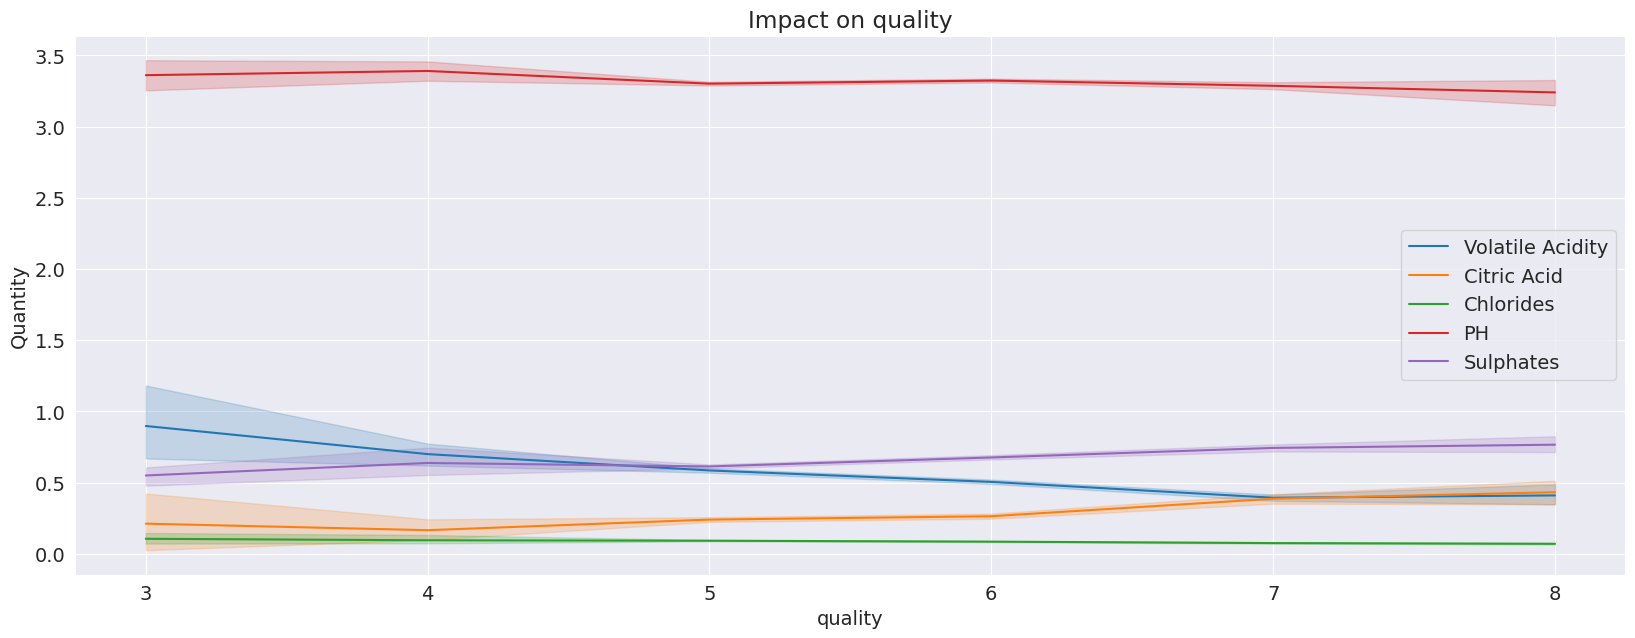

In [14]:
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

fig, ax = plt.subplots(figsize=(20, 7))

# Line plots for each chemical property
sns.lineplot(data=df, x="quality", y="volatile acidity", label="Volatile Acidity", ax=ax)
sns.lineplot(data=df, x="quality", y="citric acid", label="Citric Acid", ax=ax)
sns.lineplot(data=df, x="quality", y="chlorides", label="Chlorides", ax=ax)
sns.lineplot(data=df, x="quality", y="pH", label="PH", ax=ax)
sns.lineplot(data=df, x="quality", y="sulphates", label="Sulphates", ax=ax)

# Set labels and title
ax.set_ylabel("Quantity")
ax.set_title("Impact on quality")
ax.legend()

# Show plot
plt.show()


<Axes: xlabel='quality', ylabel='alcohol'>

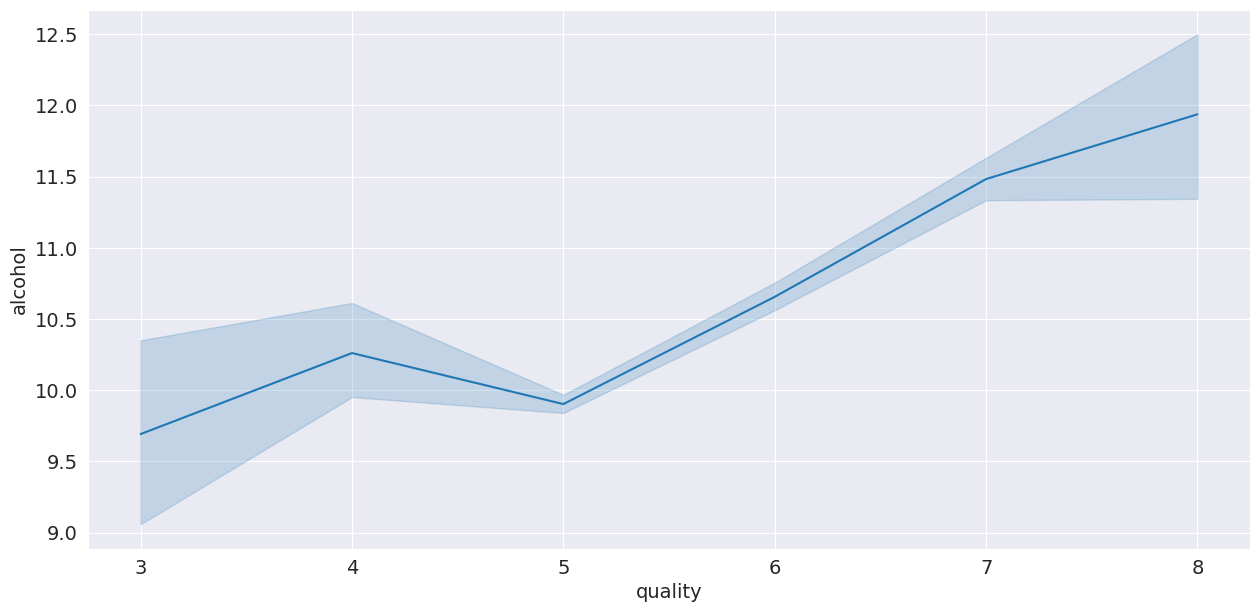

In [15]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

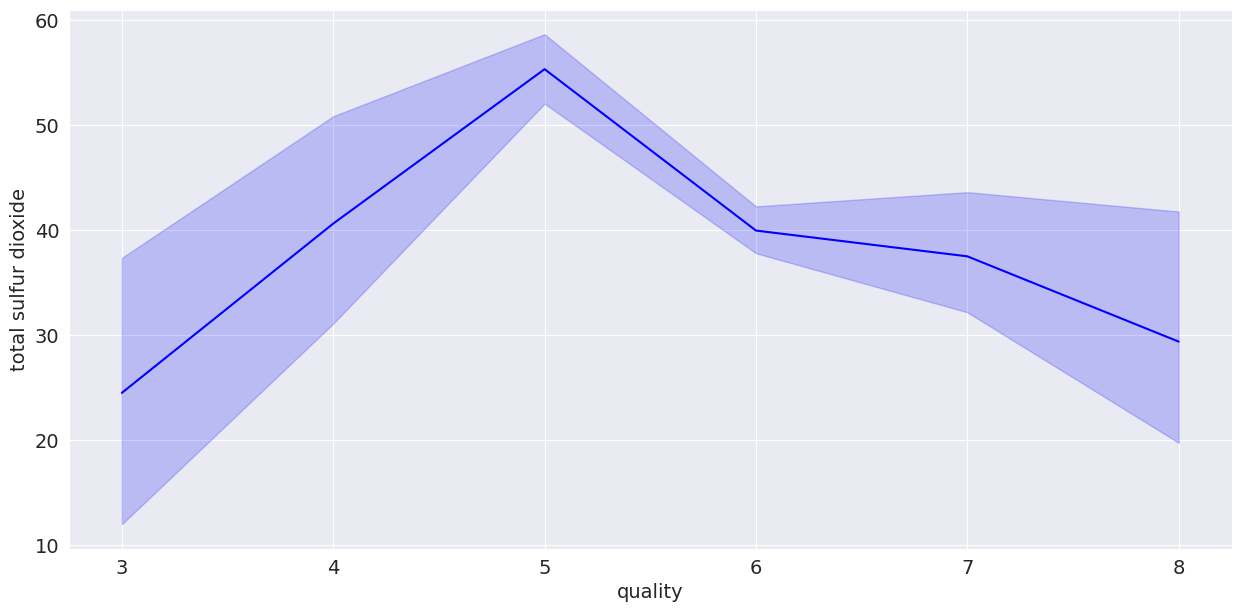

In [16]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="b")

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

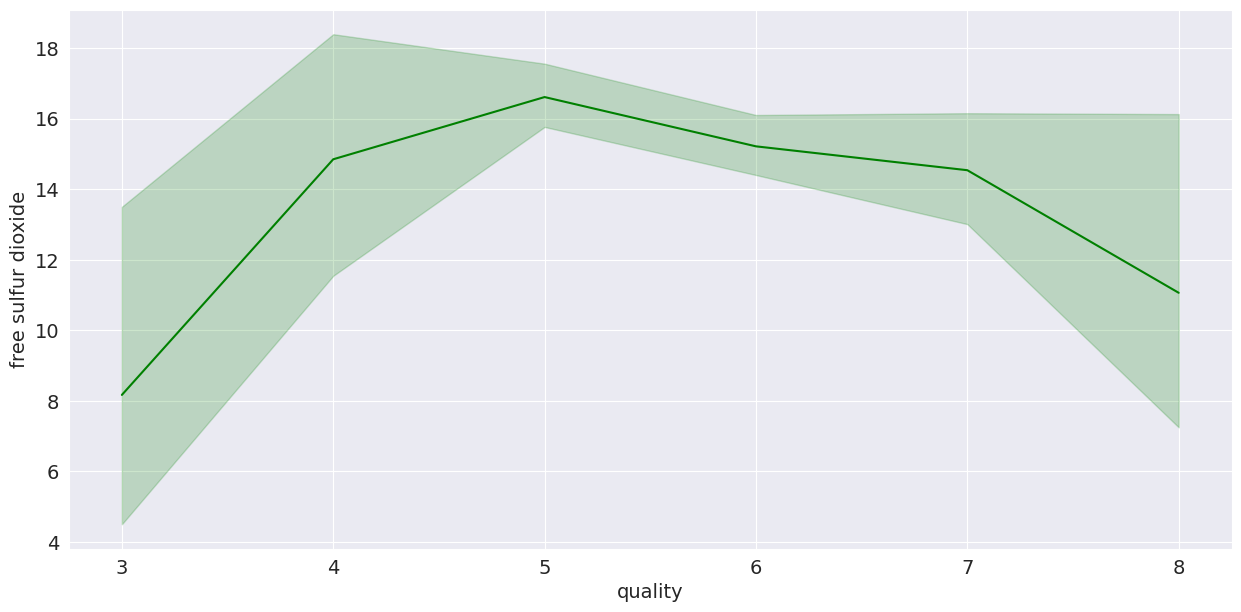

In [17]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")

In [18]:
px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

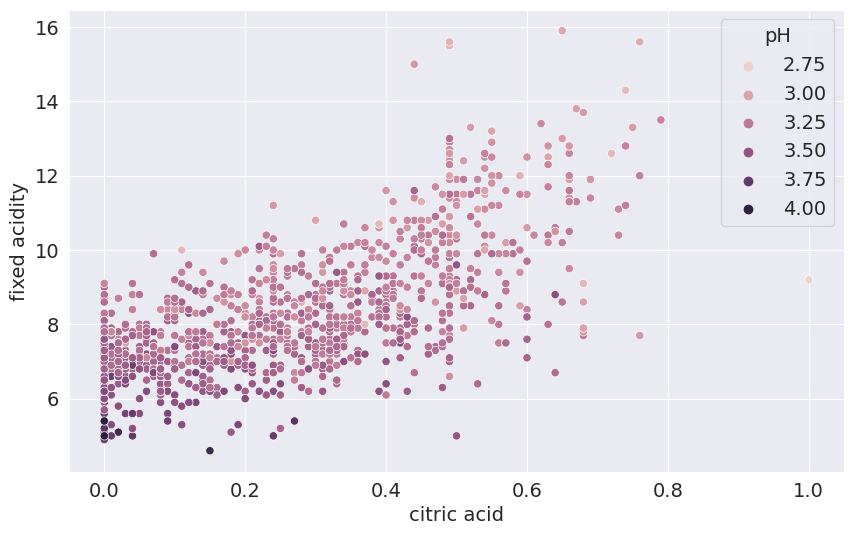

In [19]:
sns.scatterplot(data=df, y='fixed acidity', x= 'citric acid', hue= 'pH');

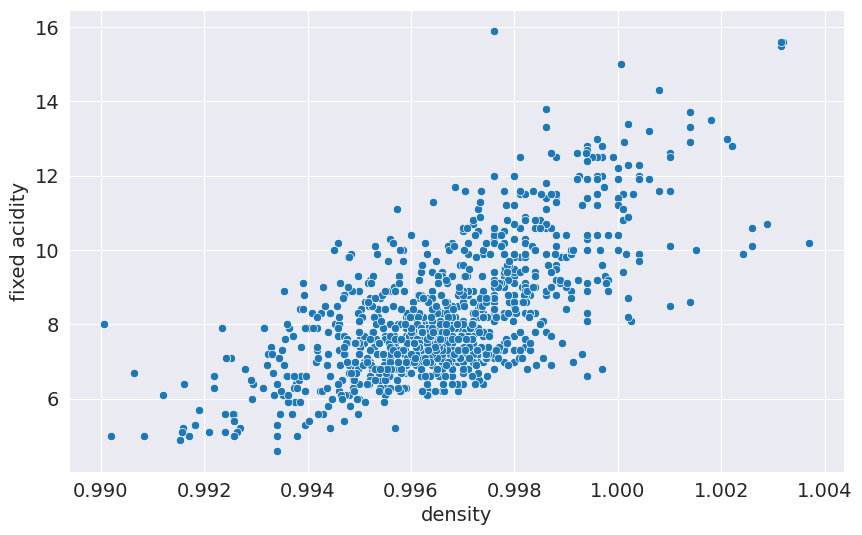

In [20]:
sns.scatterplot(data=df, y='fixed acidity', x= 'density');

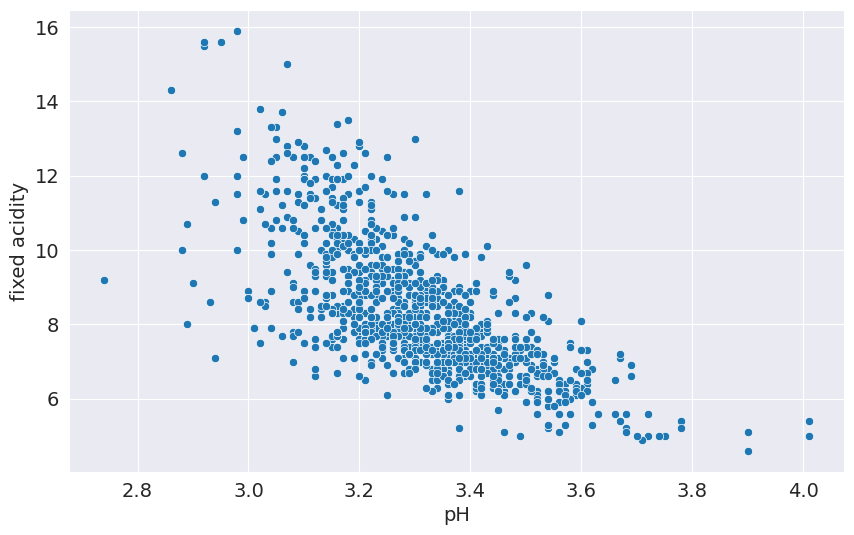

In [21]:
sns.scatterplot(data=df, y='fixed acidity', x= 'pH');

In [22]:
print(df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

7.9 is median value.


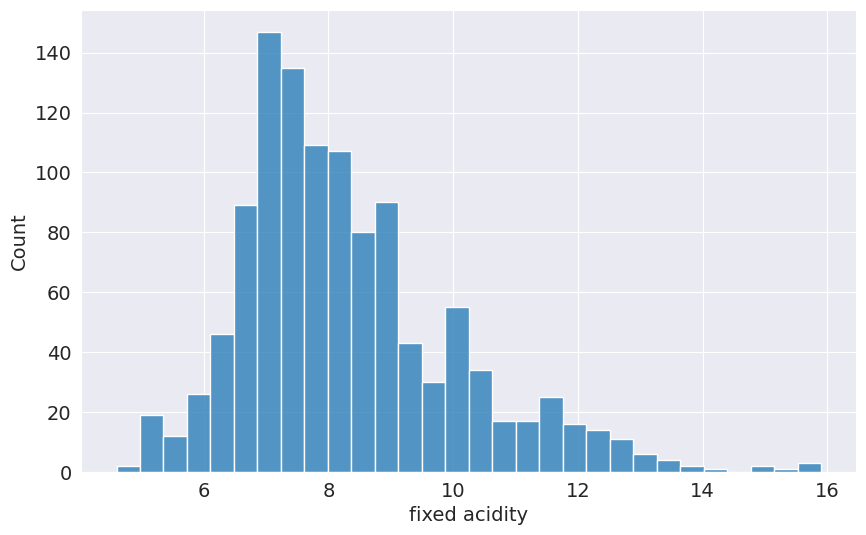

In [23]:
median_value = np.median(df['fixed acidity'])
print(f'{median_value} is median value.')
sns.histplot(data=df, x= 'fixed acidity');

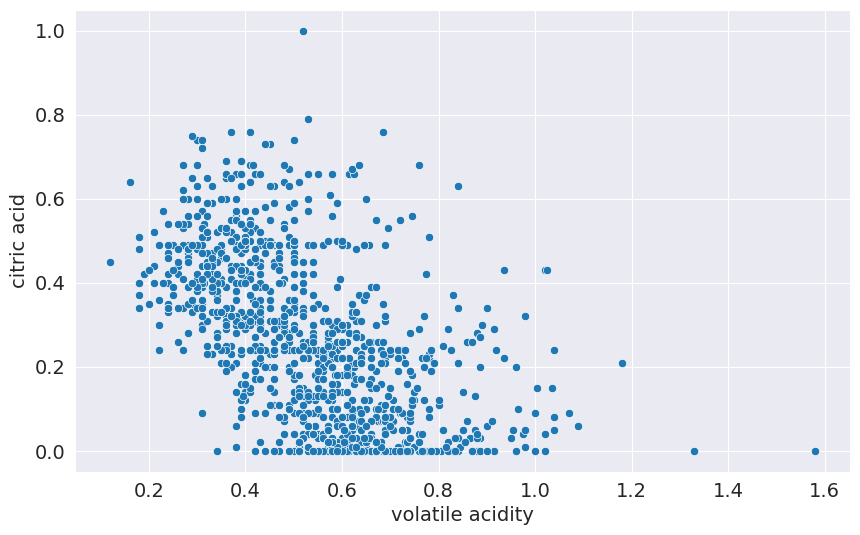

In [24]:
sns.scatterplot(data=df,y='citric acid',x='volatile acidity');

0.52 is median value.


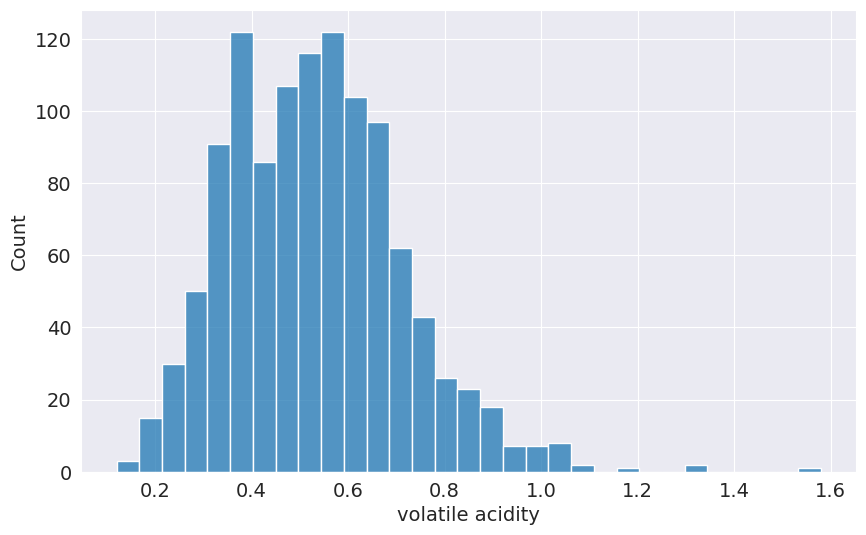

In [25]:
median_value = np.median(df['volatile acidity'])
print(f'{median_value} is median value.')
sns.histplot(data=df, x= 'volatile acidity');

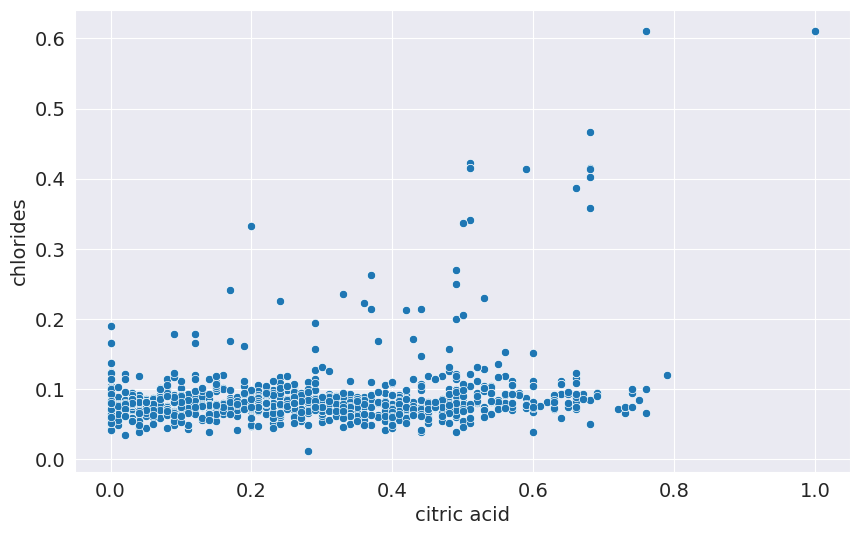

In [26]:
sns.scatterplot(data=df,x='citric acid',y='chlorides');

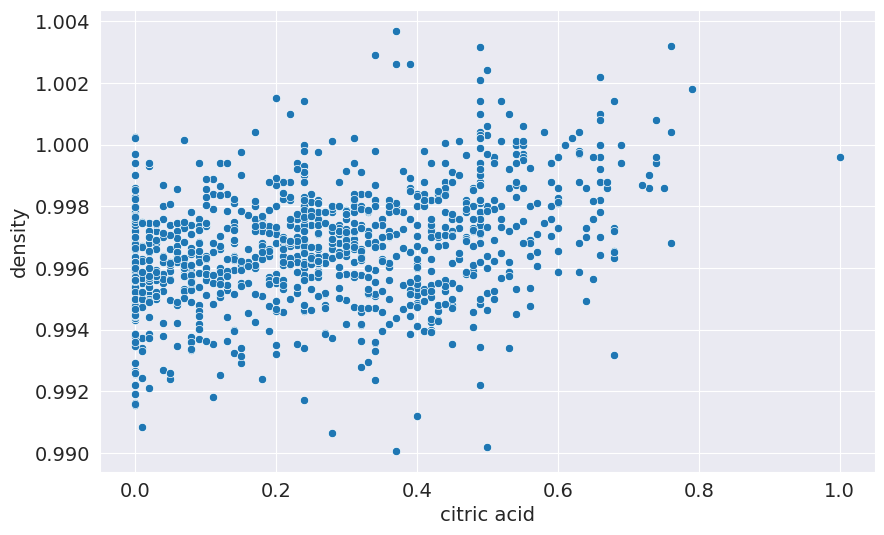

In [27]:
sns.scatterplot(data=df,x='citric acid',y='density');

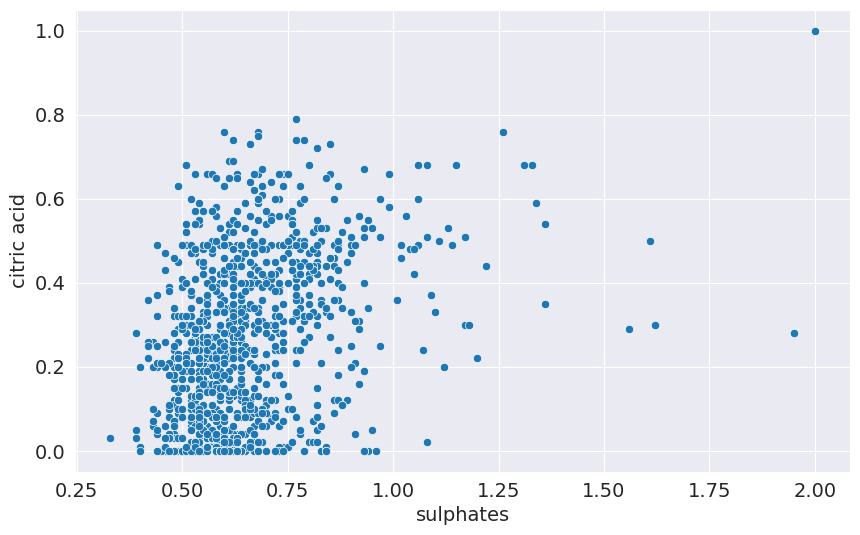

In [28]:
sns.scatterplot(data=df,y='citric acid',x='sulphates');

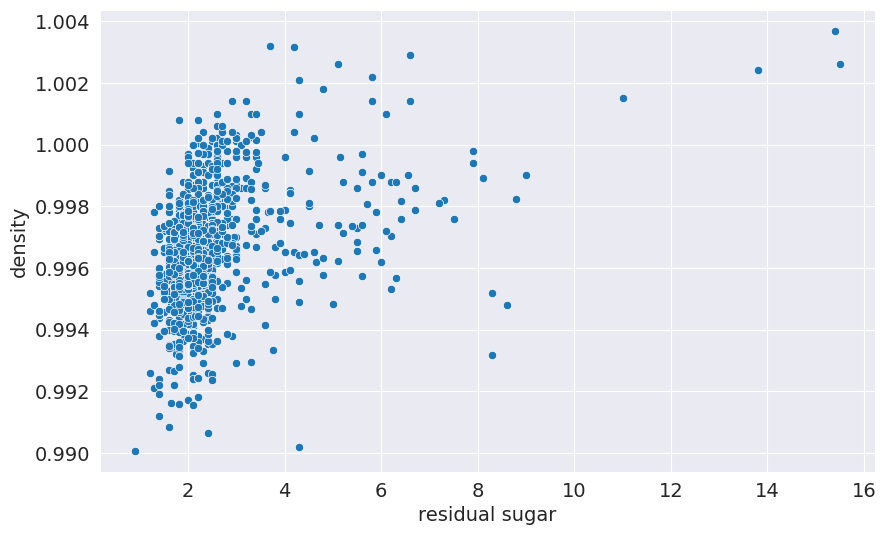

In [29]:
sns.scatterplot(data=df,x='residual sugar',y='density');

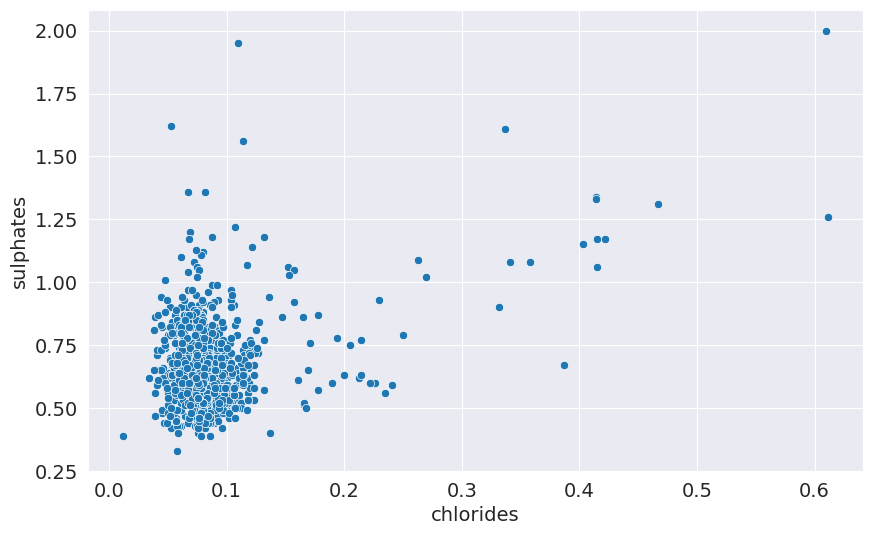

In [30]:
sns.scatterplot(data=df,x='chlorides',y='sulphates');

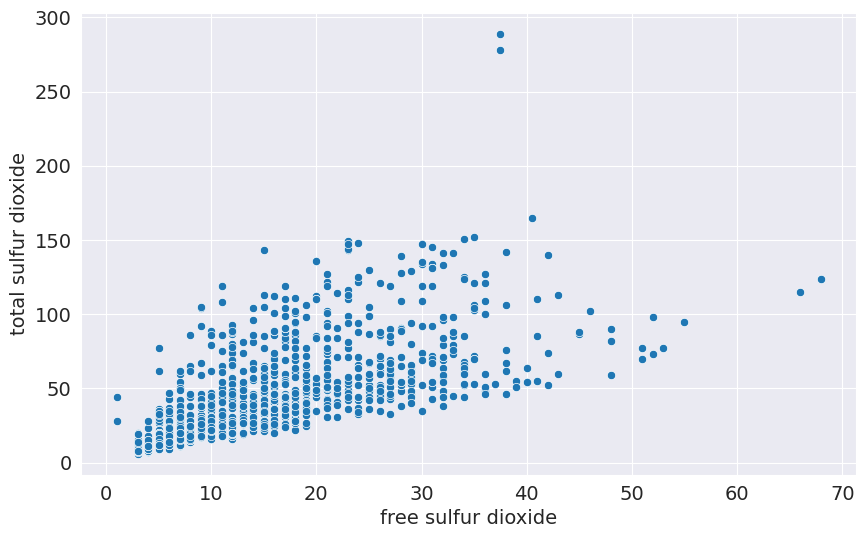

In [31]:
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide');

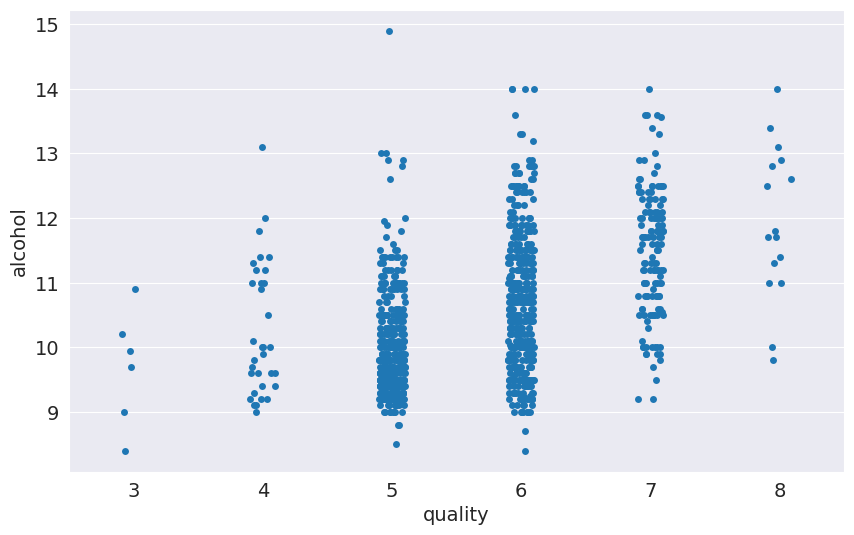

In [32]:
sns.stripplot(df,y='alcohol',x='quality');

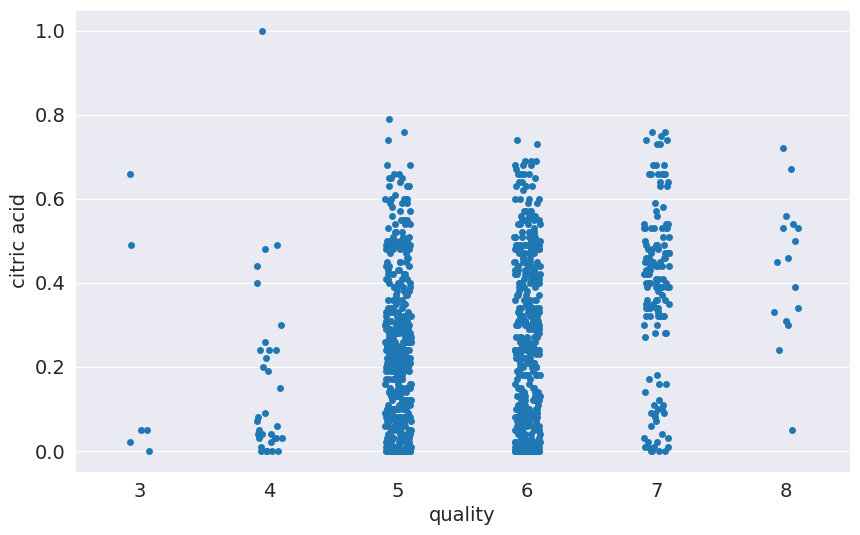

In [33]:
sns.stripplot(df,y='citric acid',x='quality');

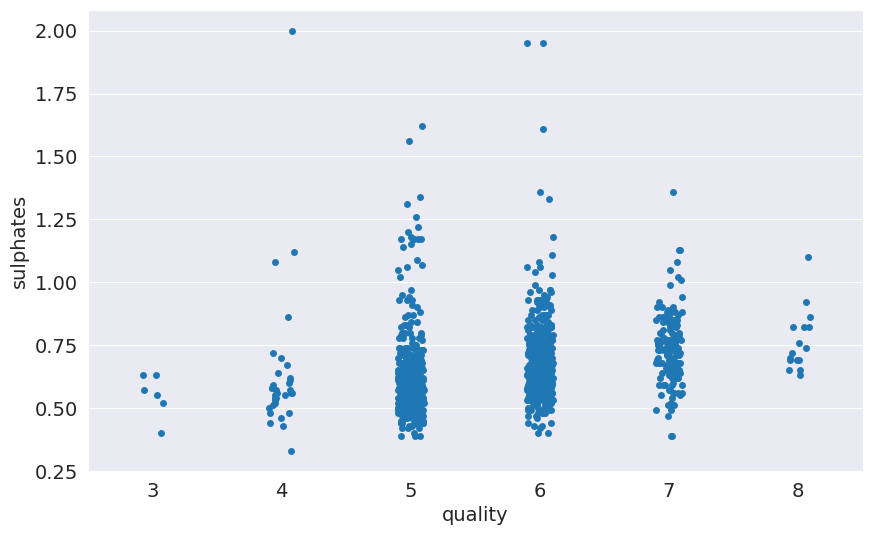

In [34]:
sns.stripplot(x="quality",y="sulphates",data=df);


In [35]:
def create_histplot(df):
    for column in df.columns:
        median_value = np.median(df[column])
        print(f'{median_value} is median value for {column}.')
        sns.histplot(data=df, x= df[column]);
        plt.show()

7.9 is median value for fixed acidity.


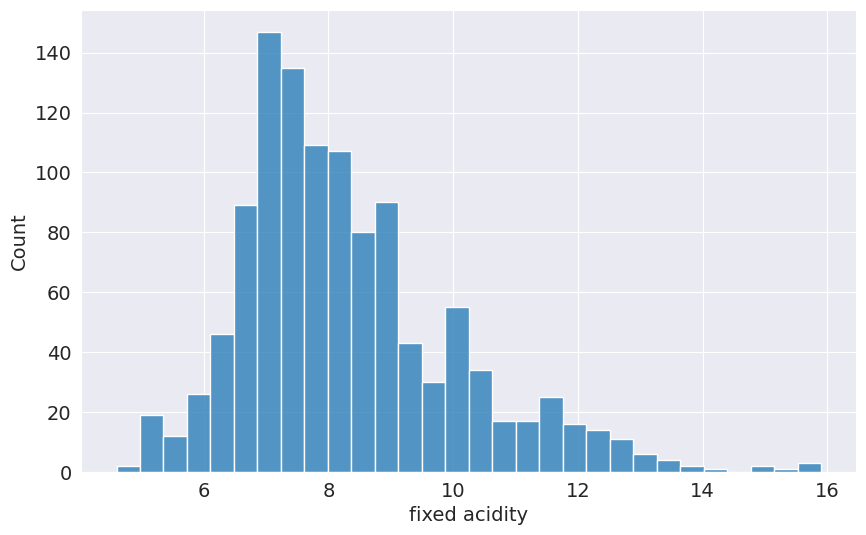

0.52 is median value for volatile acidity.


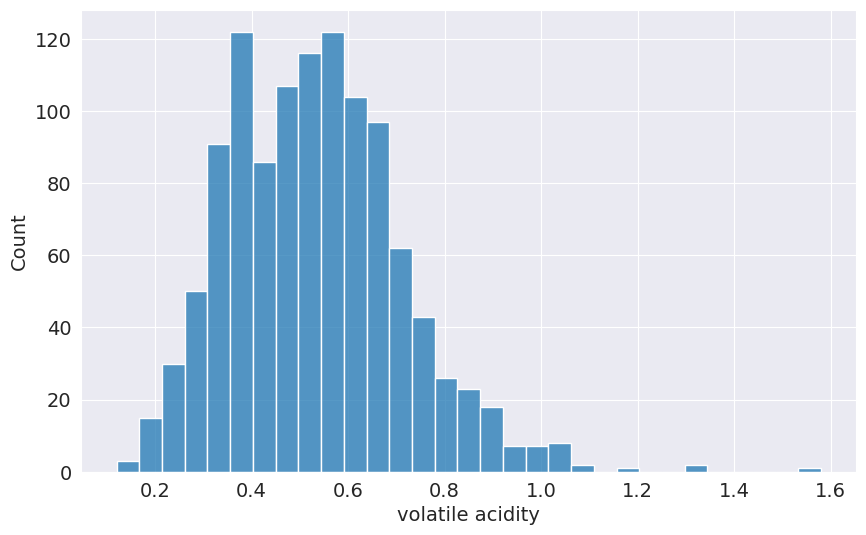

0.25 is median value for citric acid.


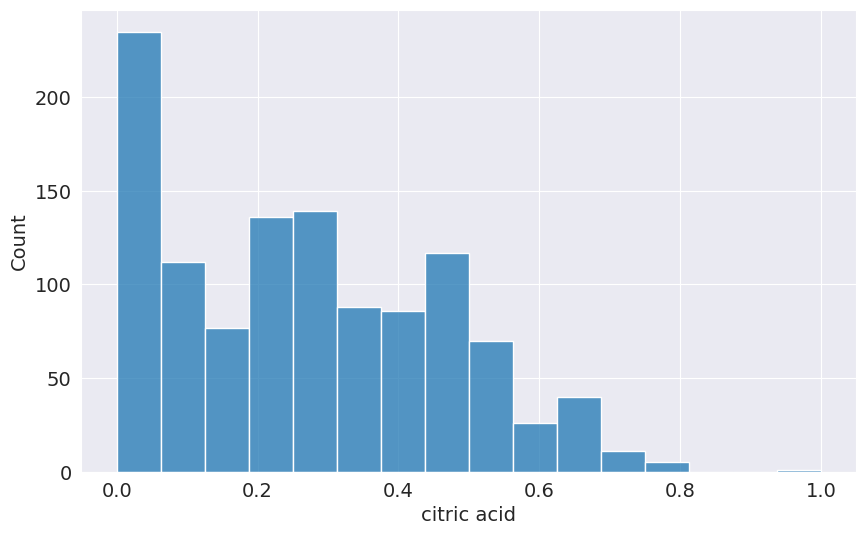

2.2 is median value for residual sugar.


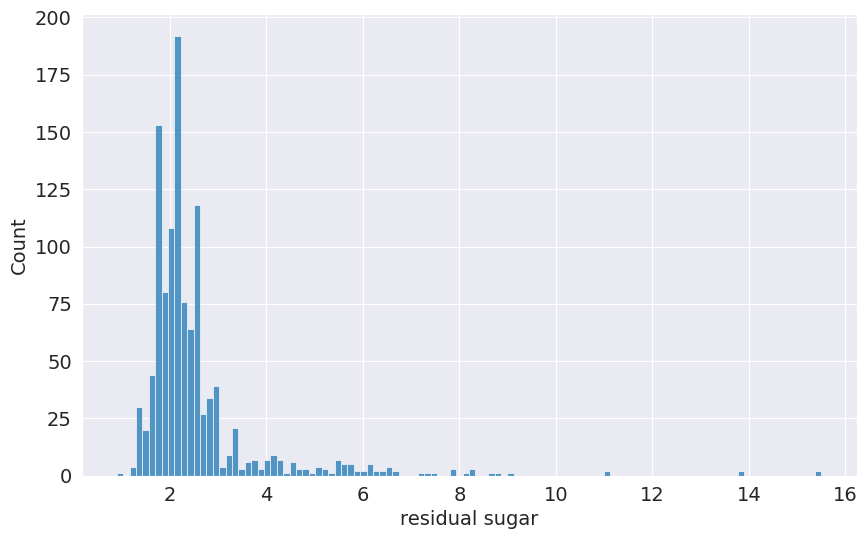

0.079 is median value for chlorides.


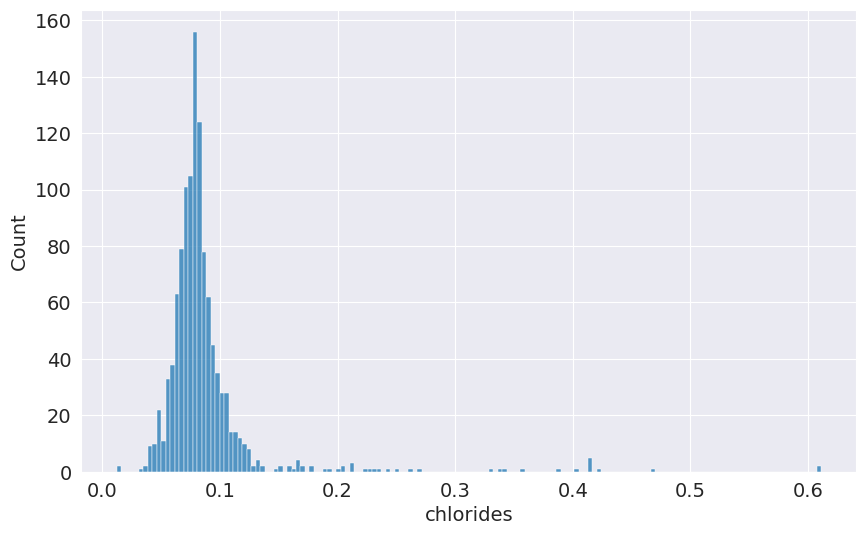

13.0 is median value for free sulfur dioxide.


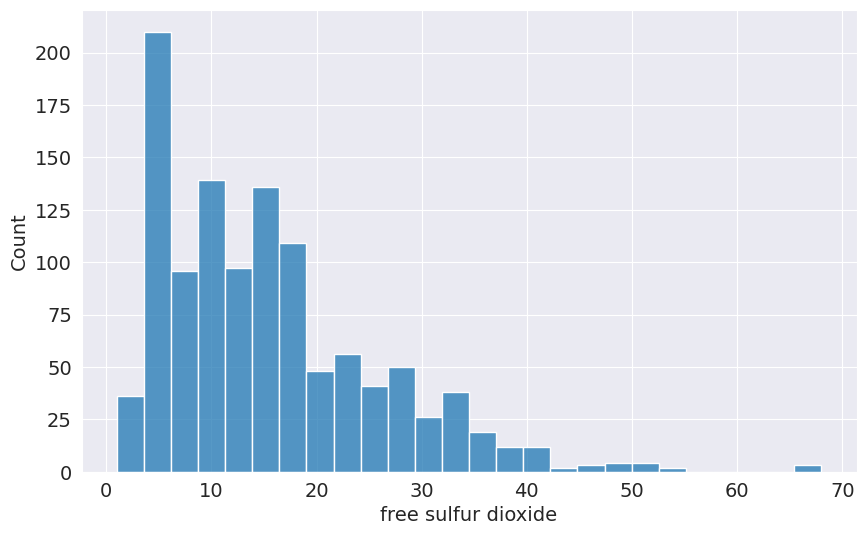

37.0 is median value for total sulfur dioxide.


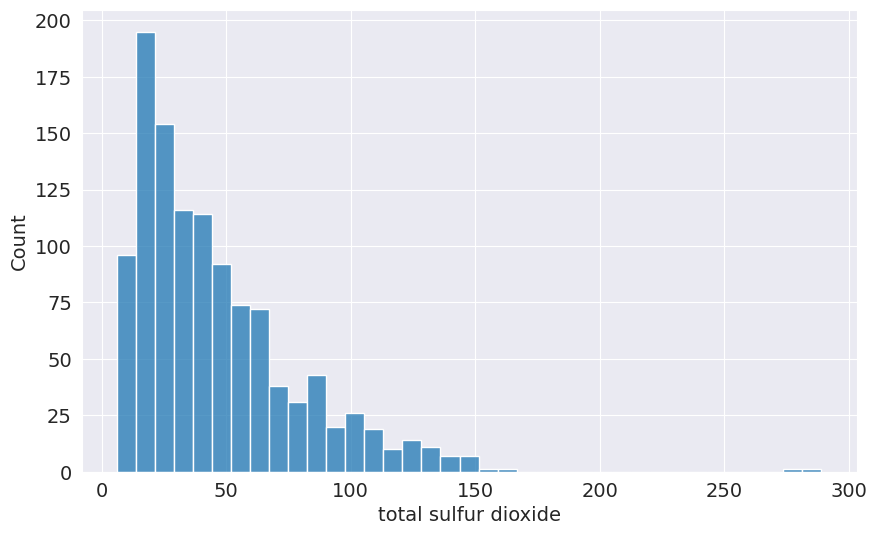

0.99668 is median value for density.


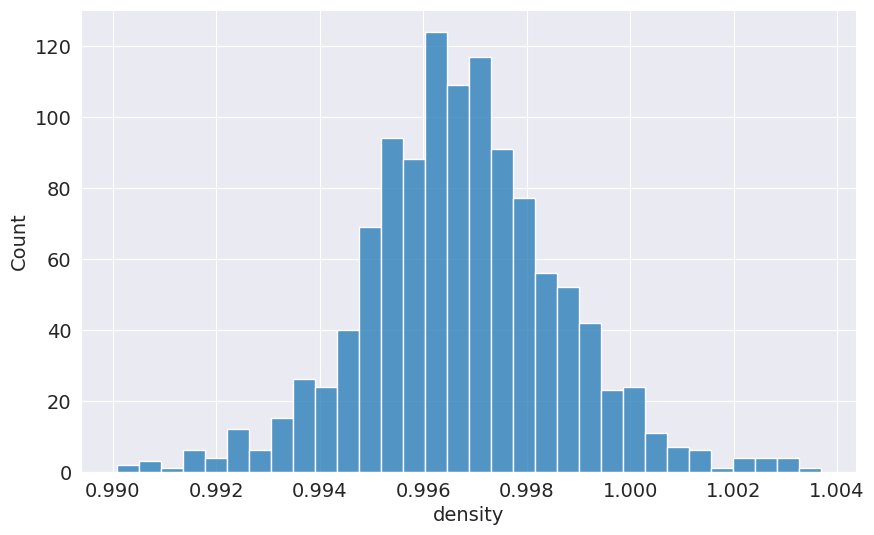

3.31 is median value for pH.


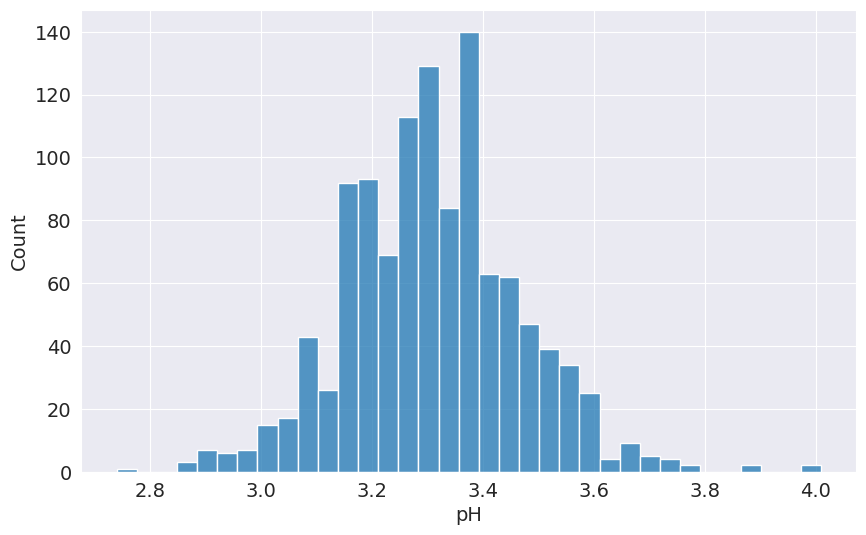

0.62 is median value for sulphates.


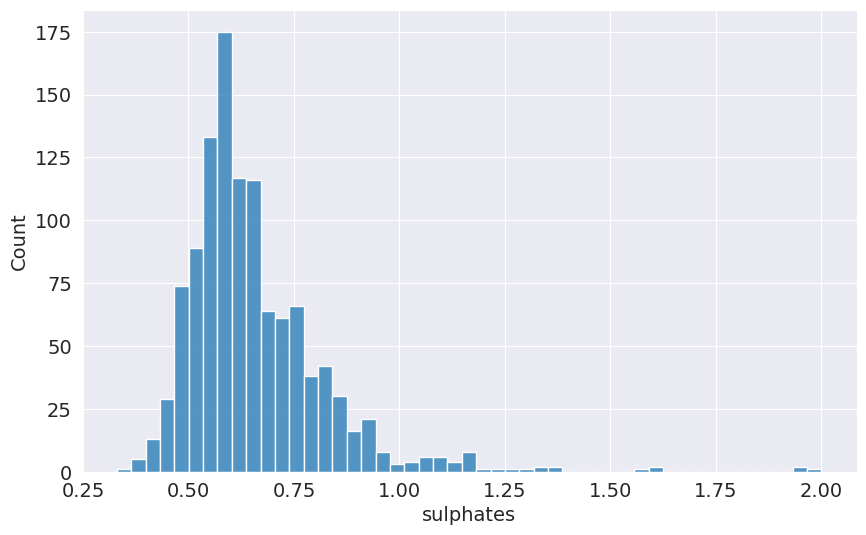

10.2 is median value for alcohol.


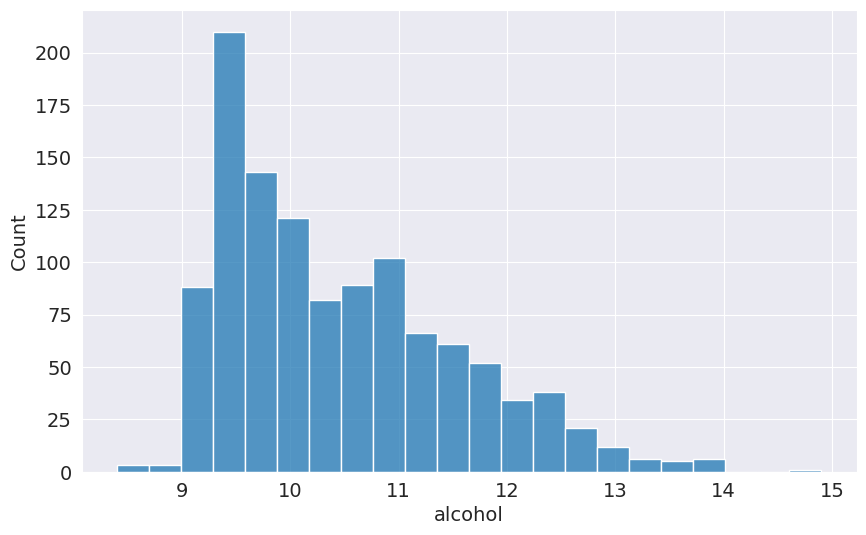

6.0 is median value for quality.


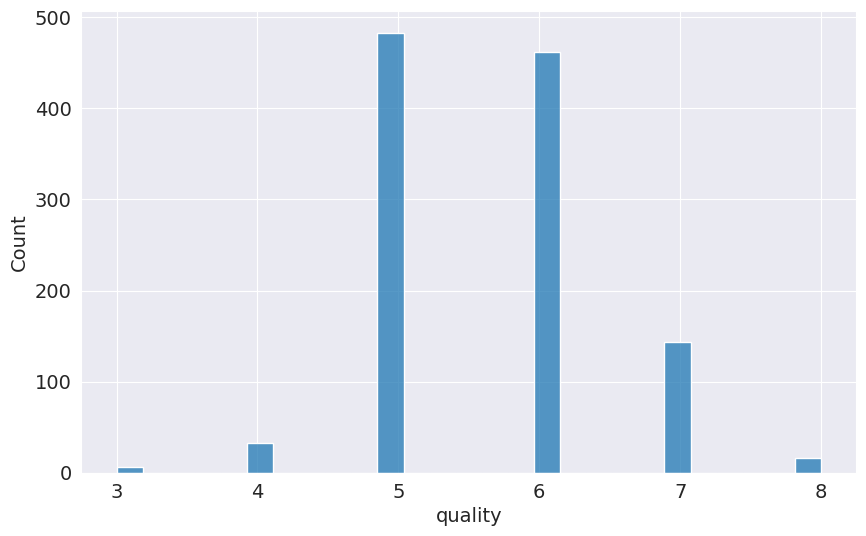

In [36]:
create_histplot(df)

In [37]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [38]:
print('train_df.shape : ',train_df.shape)
print('val_df.shape : ',val_df.shape)
print('test_df.shape : ',test_df.shape)

train_df.shape :  (685, 12)
val_df.shape :  (229, 12)
test_df.shape :  (229, 12)


In [39]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
84,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6
395,9.5,0.460,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.0,6
1035,6.5,0.900,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
918,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6
196,11.5,0.180,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6


In [40]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
84,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6
395,9.5,0.460,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.0,6
1035,6.5,0.900,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
918,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6
196,11.5,0.180,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6


In [41]:
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
158,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,5
1081,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6
291,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,5
538,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,6
367,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,6


In [42]:
input_cols = list(train_df.columns)[:-1]
target_col = 'quality'

In [43]:
print(input_cols)

print(target_col)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
quality


In [44]:
#train_df
train_inputs = train_df[input_cols].copy()

train_targets = train_df[target_col].copy()

#val_df
val_inputs = val_df[input_cols].copy()

val_targets = val_df[target_col].copy()

#test_df
test_inputs = test_df[input_cols].copy()

test_targets = test_df[target_col].copy()

In [45]:
train_inputs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
84,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9
395,9.5,0.460,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.0
1035,6.5,0.900,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9
918,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4
196,11.5,0.180,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1


In [46]:
train_targets.head()

84      6
395     6
1035    6
918     6
196     6
Name: quality, dtype: int64

In [47]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [48]:
numeric_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [49]:
train_inputs[numeric_cols].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,8.228759,0.528810,0.263124,2.500584,0.086651,15.696350,45.424088,0.996683,3.316774,0.657212,10.414234
std,1.668036,0.179181,0.192275,1.272275,0.046375,9.879452,30.891128,0.001879,0.148599,0.171045,1.051731
min,4.900000,0.160000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000
25%,7.100000,0.390000,0.080000,1.900000,0.070000,8.000000,21.000000,0.995600,3.210000,0.550000,9.500000
50%,7.800000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996640,3.320000,0.620000,10.100000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000
max,15.500000,1.580000,1.000000,15.500000,0.610000,66.000000,152.000000,1.003150,3.780000,2.000000,14.000000


In [50]:
scaler = MinMaxScaler()

In [51]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [52]:
print('Minimum')
list(scaler.data_min_)

Minimum


[4.6, 0.12, 0.0, 0.9, 0.012, 1.0, 6.0, 0.99007, 2.74, 0.33, 8.4]

In [53]:
print('Maximum')
list(scaler.data_max_)

Maximum


[15.9, 1.58, 1.0, 15.5, 0.611, 68.0, 289.0, 1.00369, 4.01, 2.0, 14.9]

In [54]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [55]:
model = LogisticRegression(solver='liblinear',penalty='l1',)

In [56]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(penalty='l1', solver='liblinear')

In [58]:
print(model.coef_.tolist())

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0546558140181, -0.3602590156486771, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7987019789548392], [-0.9267927294696104, 3.5467345182615646, 0.9572966258428197, 0.019953081240804905, 0.0, 0.0, 3.2337302875061558, 0.0, 0.0, -3.584789361240765, -5.035859857992583], [0.05607026192275011, -2.741387885760415, -1.194721524930242, -1.1832897225903602, 0.0, 0.0, -0.9980850392760258, 0.8037865376434364, 0.0, 1.130934370638235, 1.9495663024300116], [0.4348717626743079, -4.7624038781555225, 0.0, 0.0, 0.0, 0.0, -2.8163220650275416, 0.0, 0.0, 2.2213501050539466, 4.30924307389938], [0.0, -1.752296401203258, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2660217202027809, 0.0, 0.0, 1.418263634630286]]


In [59]:
print(model.intercept_)

[-4.91264623 -3.69461387  0.50363932 -0.33794073 -2.6151291  -4.20425107]
